## Installing Dependencies

In [5]:
# Install Neural Prophet
!pip install neuralprophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Preprocessing
- Keeping only the Date and AQI columns

In [6]:
df = pd.read_csv('/content/Warangal.csv')

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 338
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      339 non-null    object 
 1   max_temp  339 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 969
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     970 non-null    int64  
 1   date           970 non-null    object 
 2   location       970 non-null    object 
 3   min_temp       970 non-null    float64
 4   max_temp       970 non-null    float64
 5   min_humidity   970 non-null    float64
 6   max_humidity   970 non-null    float64
 7   min_windspeed  832 non-null    float64
 8   max_windspeed  890 non-null    float64
 9   rain           970 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 8

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1309 non-null   object 
 1   max_temp  1309 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.6+ KB


In [8]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1309 non-null   datetime64[ns]
 1   y       1309 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.7 KB


## Normalising the data - MinMax Scaling

In [9]:
# Data normalisation - Change the AQI into 0-1 MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = df['y'].values.reshape(-1, 1)
# fit the scaler to the data and transform it
scaled_values = scaler.fit_transform(values)
# assign the transformed data to the original column
df['y'] = scaled_values 

In [10]:
# Save the scaler values for forecast later
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

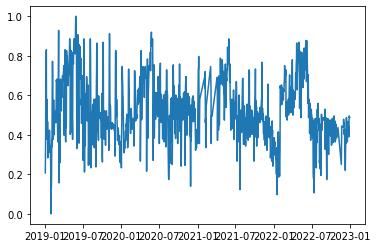

In [11]:
plt.plot(df['ds'], df['y'])
plt.show()

In [12]:
df

,ds,y
0,2019-01-01,0.207627
1,2019-01-02,0.305085
2,2019-01-03,0.457627
3,2019-01-04,0.813559
4,2019-01-05,0.805085
...,...,...
1304,2022-12-27,0.389831
1305,2022-12-28,0.466102
1306,2022-12-29,0.495763
1307,2022-12-30,0.487288


In [13]:
#define the model and parameters
from neuralprophet import NeuralProphet
m = NeuralProphet(
    n_changepoints=100,
    trend_reg=4,
    yearly_seasonality=4,
    weekly_seasonality=False,
    daily_seasonality=False,

)
#metrics = m.fit(df, freq="D")
#forecast = m.predict(df)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.326% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.326% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.5% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

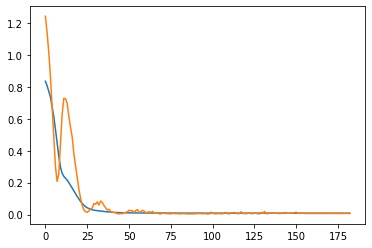

In [14]:
# Train-Test Split and,Train the model
df_train, df_test = m.split_df(df, freq="D", valid_p=1.0 / 12)
metrics = m.fit(df_train, freq="D", validation_df=df_test, progress="plot")

In [15]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
182,0.077399,0.097041,0.00704,0.0,182,0.099538,0.129139,0.008839,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.5% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.5% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 38it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


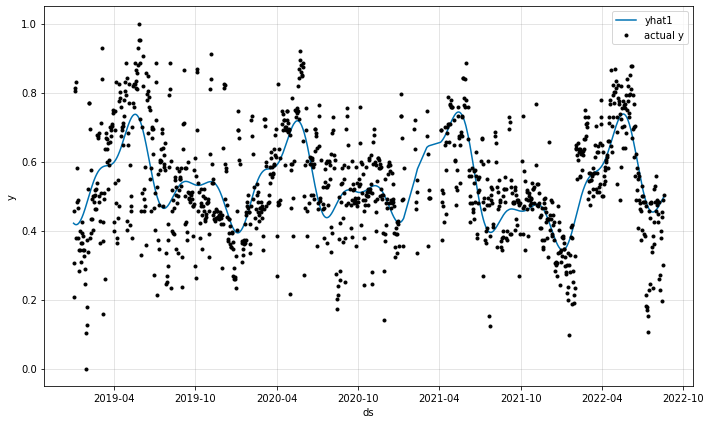

In [18]:
forecast_train = m.predict(df_train)
fig = m.plot(forecast_train)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.495% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.495% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.495% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.495% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 38it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


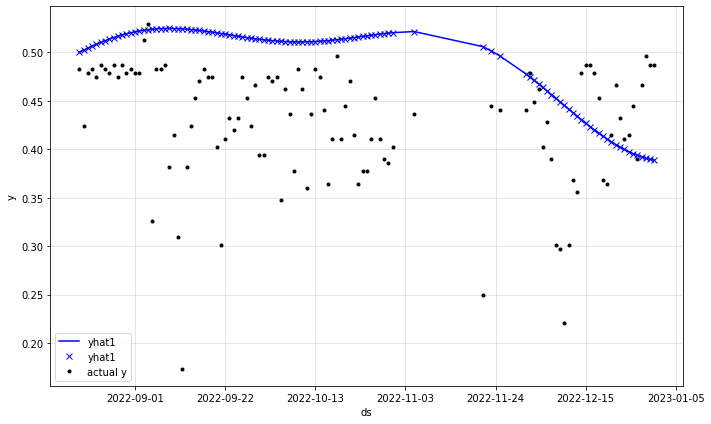

In [19]:
forecast_test = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_test[-7 * 24 :])

In [20]:
df_test
t1_actual = scaler.inverse_transform([df_test['y']])
print(t1_actual)

[[32.9 31.5 32.8 32.9 32.7 33.  32.9 32.8 33.  32.7 33.  32.8 32.9 32.8
  32.8 33.6 34.  29.2 32.9 32.9 33.  30.5 31.3 28.8 25.6 30.5 31.5 32.2
  32.6 32.9 32.7 32.7 31.  28.6 31.2 31.7 31.4 31.7 32.7 32.2 31.5 32.5
  30.8 30.8 32.7 32.6 32.7 29.7 32.4 31.8 30.4 32.9 32.4 30.  31.8 32.9
  32.7 31.9 30.1 31.2 33.2 31.2 32.  32.6 31.3 30.1 30.4 30.4 31.2 32.2
  31.2 30.7 30.6 31.  31.8 27.4 32.  31.9 31.9 32.8 32.1 32.4 31.  31.6
  30.7 28.6 28.5 26.7 28.6 30.2 29.9 32.8 33.  33.  32.8 32.2 30.2 30.1
  31.3 32.5 31.7 31.2 31.3 32.  30.7 32.5 33.2 33.  33. ]]


In [21]:
#forecast
t1_pred= scaler.inverse_transform([forecast_test['yhat1']])
print(t1_pred)

[[33.30169222 33.35365741 33.40389521 33.45222275 33.49846561 33.54247186
  33.58410225 33.6232372  33.65976982 33.69361851 33.72471435 33.7530067
  33.77846038 33.80106134 33.82081099 33.83772337 33.8518379  33.86320238
  33.87187731 33.87794569 33.88149893 33.88264256 33.8814919  33.87817638
  33.87283244 33.86560779 33.85665715 33.84614229 33.83423343 33.82109654
  33.80691168 33.79185469 33.77610421 33.7598403  33.74324019 33.72647691
  33.70972488 33.69314868 33.6769115  33.66116946 33.64606605 33.63174334
  33.61833215 33.60594642 33.5947001  33.58468742 33.57599421 33.56868796
  33.56283481 33.55847273 33.55563688 33.55433993 33.55459032 33.55637116
  33.55965574 33.56440747 33.57057009 33.57807045 33.586834   33.59676368
  33.60774837 33.6196713  33.63240025 33.64579597 33.65970371 33.67396452
  33.68841102 33.70286596 33.71714787 33.73106968 33.74444149 33.75706635
  33.76875014 33.77929595 33.80815377 33.44111991 33.33399076 33.21345536
  32.78103527 32.70038387 32.61782643 3

In [22]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(t1_actual, t1_pred) #transformed values

0.05981819550869928

In [23]:
mean_absolute_percentage_error(df_test['y'], forecast_test['yhat1'])

0.21210446798391352

In [24]:
print(len(t1_actual[0]), len(t1_pred[0]))

109 109


In [25]:
# Compare the predicted value vs actual value
data = {'actual': t1_actual[0], 'prediction': t1_pred[0]}
# create a DataFrame from the dictionary
df1 = pd.DataFrame(data)

WARNING - (NP.forecaster.plot_parameters) - highlight_forecast_step_n is ignored since autoregression not enabled.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


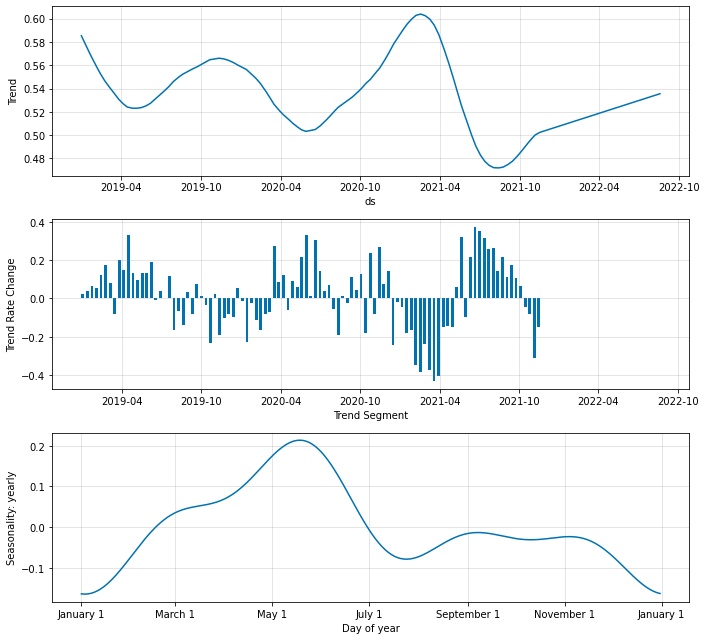

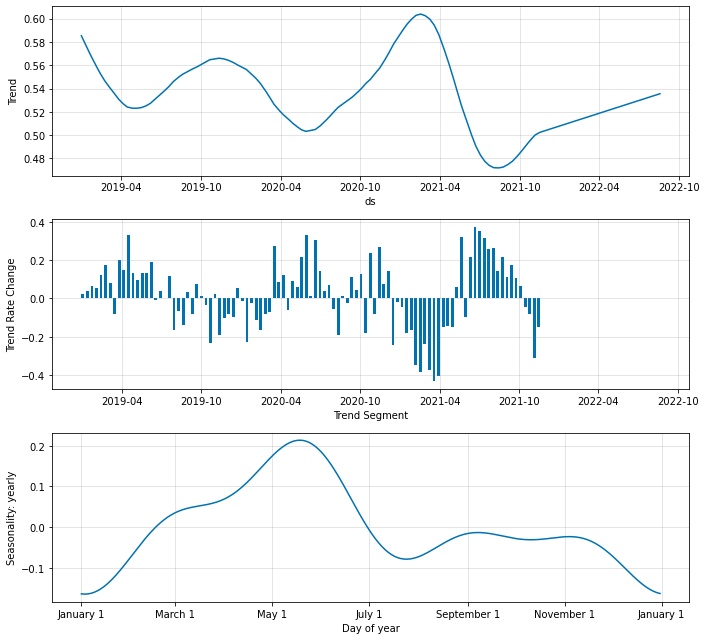

In [38]:
m.plot_parameters()

In [26]:
df = pd.read_csv('/content/Warangal.csv')
df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      339 non-null    datetime64[ns]
 1   y       339 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [27]:
import pickle
pkl_path = "/content/model.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)

In [28]:
# Forecast for more days
future = m.make_future_dataframe(df, periods=1500)
forecast_more_years = m.predict(future)
forecast_more_years

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.23% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.23% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is e

Predicting: 38it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.388049,0.551962,-0.163912
1,2023-01-02,None,0.387621,0.552082,-0.164461
2,2023-01-03,None,0.387444,0.552203,-0.164758
3,2023-01-04,None,0.387522,0.552323,-0.164801
4,2023-01-05,None,0.387856,0.552444,-0.164587
...,...,...,...,...,...
1495,2027-02-04,None,0.671093,0.732156,-0.061063
1496,2027-02-05,None,0.676272,0.732276,-0.056004
1497,2027-02-06,None,0.681419,0.732397,-0.050978
1498,2027-02-07,None,0.686521,0.732518,-0.045996


In [29]:
# Save forecast
# save the dataframe
forecast_more_years.to_pickle("/content/forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [30]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("/content/forecast.pkl")

In [31]:
fcast

,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.388049,0.551962,-0.163912
1,2023-01-02,None,0.387621,0.552082,-0.164461
2,2023-01-03,None,0.387444,0.552203,-0.164758
3,2023-01-04,None,0.387522,0.552323,-0.164801
4,2023-01-05,None,0.387856,0.552444,-0.164587
...,...,...,...,...,...
1495,2027-02-04,None,0.671093,0.732156,-0.061063
1496,2027-02-05,None,0.676272,0.732276,-0.056004
1497,2027-02-06,None,0.681419,0.732397,-0.050978
1498,2027-02-07,None,0.686521,0.732518,-0.045996


In [32]:
extract_ds=forecast_more_years['ds']
df_extract_ds=pd.DataFrame(extract_ds)
df_extract_ds

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1495,2027-02-04
1496,2027-02-05
1497,2027-02-06
1498,2027-02-07


In [33]:
#forecast
final_forecast= scaler.inverse_transform([forecast_more_years['yhat1']])
print(final_forecast)

[[30.6579657  30.64786088 30.64368519 ... 37.58149016 37.70189967
  37.82096581]]


In [34]:
df = pd.DataFrame(final_forecast[0],)
df

,0
0,30.657966
1,30.647861
2,30.643685
3,30.645515
4,30.653409
...,...
1495,37.337787
1496,37.460020
1497,37.581490
1498,37.701900


In [35]:
merged_df = pd.concat([df_extract_ds,df], axis=1)
merged_df

,ds,0
0,2023-01-01,30.657966
1,2023-01-02,30.647861
2,2023-01-03,30.643685
3,2023-01-04,30.645515
4,2023-01-05,30.653409
...,...,...
1495,2027-02-04,37.337787
1496,2027-02-05,37.460020
1497,2027-02-06,37.581490
1498,2027-02-07,37.701900


In [37]:
merged_df.to_csv('/content/WarangalMaxTpredict.csv')